In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")

In [2]:
# Step 1: Load the Data & Rename Columns

books = pd.read_csv("../data/raw/Books.csv", encoding="latin1", low_memory=False)
ratings = pd.read_csv("../data/raw/Ratings.csv", encoding="latin1")
users = pd.read_csv("../data/raw/Users.csv", encoding="latin1")

def clean_columns(df):
    df.columns = df.columns.str.lower().str.replace('-', '_', regex=True)

for df in [books, ratings, users]:
    clean_columns(df)

users.rename(columns={'age': 'user_age'}, inplace=True)
books.rename(columns={
    'year_of_publication': 'book_year_of_publication',
    'publisher': 'book_publisher',
    'image_url_s': 'book_image_url_s',
    'image_url_m': 'book_image_url_m',
    'image_url_l': 'book_image_url_l'
}, inplace=True)

In [3]:
# Step 2: Initial Overview

print("Books Dataset Overview:")
print(books.info())
print("\nRatings Dataset Overview:")
print(ratings.info())
print("\nUsers Dataset Overview:")
print(users.info())

display(books.head())
display(ratings.head())
display(users.head())

Books Dataset Overview:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271360 entries, 0 to 271359
Data columns (total 8 columns):
 #   Column                    Non-Null Count   Dtype 
---  ------                    --------------   ----- 
 0   isbn                      271360 non-null  object
 1   book_title                271360 non-null  object
 2   book_author               271358 non-null  object
 3   book_year_of_publication  271360 non-null  object
 4   book_publisher            271358 non-null  object
 5   book_image_url_s          271360 non-null  object
 6   book_image_url_m          271360 non-null  object
 7   book_image_url_l          271357 non-null  object
dtypes: object(8)
memory usage: 16.6+ MB
None

Ratings Dataset Overview:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1149780 entries, 0 to 1149779
Data columns (total 3 columns):
 #   Column       Non-Null Count    Dtype 
---  ------       --------------    ----- 
 0   user_id      1149780 non-null  int64 
 1

,isbn,book_title,book_author,book_year_of_publication,book_publisher,book_image_url_s,book_image_url_m,book_image_url_l
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...


,user_id,isbn,book_rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6


,user_id,location,user_age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",NaN


In [4]:
# Step 3: Check and Handle Missing Values

# --- Books ---
print("\n--- Handling missing values in Books ---")
print("Books missing values:")
print(books.isnull().sum()[lambda x: x > 0])

books['book_author'] = books['book_author'].fillna('Unknown')
books['book_publisher'] = books['book_publisher'].fillna('Unknown')
books['book_image_url_l'] = books['book_image_url_l'].fillna('-')

# Convert publication year to numeric, fill invalid with NaN, then use median
books['book_year_of_publication'] = pd.to_numeric(books['book_year_of_publication'], errors='coerce')
books['book_year_of_publication'] = books['book_year_of_publication'].fillna(books['book_year_of_publication'].median())

# Cap out-of-range years
books.loc[books['book_year_of_publication'] < 1000, 'book_year_of_publication'] = 1000
books.loc[books['book_year_of_publication'] > 2025, 'book_year_of_publication'] = 2025

# --- Ratings ---
print("\n--- Handling missing values in Ratings ---")
print("Ratings missing values:")
print(ratings.isnull().sum()[lambda x: x > 0])

# If 0 indicates "unrated", remove it
initial_ratings_count = len(ratings)
ratings = ratings[ratings['book_rating'] != 0]
removed_zeroes = initial_ratings_count - len(ratings)
print(f"Removed {removed_zeroes} ratings with book_rating=0.")

# --- Users ---
print("\n--- Handling missing values in Users ---")
print("Users missing values:")
print(users.isnull().sum()[lambda x: x > 0])

# Fill missing user ages with median, then convert to int
users['user_age'] = users['user_age'].fillna(users['user_age'].median())
users['user_age'] = users['user_age'].astype(int)

# Cap ages to a reasonable range
users.loc[users['user_age'] < 5, 'user_age'] = 5
users.loc[users['user_age'] > 100, 'user_age'] = 100


--- Handling missing values in Books ---
Books missing values:
book_author         2
book_publisher      2
book_image_url_l    3
dtype: int64

--- Handling missing values in Ratings ---
Ratings missing values:
Series([], dtype: int64)
Removed 716109 ratings with book_rating=0.

--- Handling missing values in Users ---
Users missing values:
user_age    110762
dtype: int64


In [5]:
# Step 4 : Split `location` into city/state/country

location_split = users['location'].str.split(',', expand=True)
users['user_city'] = location_split[0].str.strip().str.upper()
users['user_state'] = location_split[1].str.strip().str.upper()
users['user_country'] = location_split[2].str.strip().str.upper()

users.drop(columns=['location'], inplace=True)
display(users.head())

,user_id,user_age,user_city,user_state,user_country
0,1,32,NYC,NEW YORK,USA
1,2,18,STOCKTON,CALIFORNIA,USA
2,3,32,MOSCOW,YUKON TERRITORY,RUSSIA
3,4,17,PORTO,V.N.GAIA,PORTUGAL
4,5,32,FARNBOROUGH,HANTS,UNITED KINGDOM


In [6]:
# Step 5: Check and Handle Duplicate Values

duplicates_books = books.duplicated(subset=['isbn']).sum()
duplicates_users = users.duplicated(subset=['user_id']).sum()
duplicates_ratings = ratings.duplicated(subset=['user_id', 'isbn']).sum()

print(f"\nDuplicate books (by ISBN): {duplicates_books}")
print(f"Duplicate users (by user_id): {duplicates_users}")
print(f"Duplicate ratings (by user_id+isbn): {duplicates_ratings}")

# Drop duplicates if they exist
if duplicates_books > 0:
    books.drop_duplicates(subset=['isbn'], keep='first', inplace=True)
if duplicates_users > 0:
    users.drop_duplicates(subset=['user_id'], keep='first', inplace=True)
if duplicates_ratings > 0:
    ratings.drop_duplicates(subset=['user_id', 'isbn'], keep='first', inplace=True)


Duplicate books (by ISBN): 0
Duplicate users (by user_id): 0
Duplicate ratings (by user_id+isbn): 0


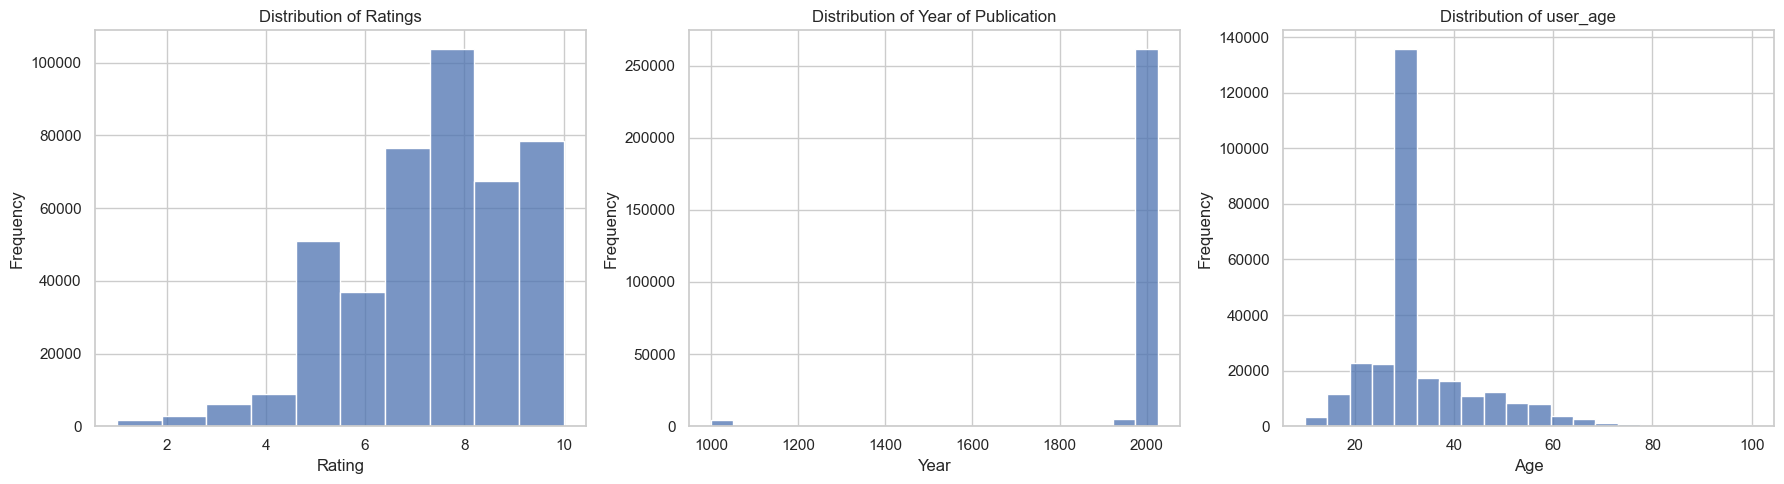

Histogram plots saved to ../images/book_rating_distribution_plots.png


In [7]:
# Step 6: Exploratory Analysis (Histograms)

fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Plot 1: Distribution of Ratings
sns.histplot(ratings['book_rating'], bins=10, kde=False, ax=axes[0])
axes[0].set_title("Distribution of Ratings")
axes[0].set_xlabel("Rating")
axes[0].set_ylabel("Frequency")

# Plot 2: Distribution of Year of Publication
sns.histplot(books['book_year_of_publication'], bins=20, kde=False, ax=axes[1])
axes[1].set_title("Distribution of Year of Publication")
axes[1].set_xlabel("Year")
axes[1].set_ylabel("Frequency")

# Plot 3: Distribution of user_age (filtered for realistic ages)
filtered_users = users[(users['user_age'] >= 10) & (users['user_age'] <= 100)]
sns.histplot(filtered_users['user_age'], bins=20, kde=False, ax=axes[2])
axes[2].set_title("Distribution of user_age")
axes[2].set_xlabel("Age")
axes[2].set_ylabel("Frequency")

plt.tight_layout()
plt.show()

os.makedirs("../images", exist_ok=True)
fig.savefig(os.path.join("../images", "book_rating_distribution_plots.png"))
print("Histogram plots saved to ../images/book_rating_distribution_plots.png")

### **Distribution of Ratings**
- Most ratings cluster between **6 and 9**, indicating users tend to rate books positively.  
- Lower ratings (1–3) are relatively few, suggesting people might skip rating books they dislike.  
- This skew toward higher scores is common in real-world rating data.
- **Ratings** are positive-skewed, lack of negative feedback. 

### **Distribution of Year of Publication**
- The bulk of books were published **after 1900**, with a peak around the late 20th century.  
- Very few older books appear; many "classics" may be missing or underrepresented.  
- We capped extreme years (below 1000 or above 2025) to clean the data.
- **Publication years** are mostly modern, limiting data on older titles.  

### **Distribution of User Age (Filtered: 10–100)**
- User ages center around the **late 20s and early 30s**, with fewer very young or very old users.  
- Some ages might be default or approximate if the user skipped entering a real value.  
- This indicates our user base skews younger adults.
- **User ages** show a younger adult bias, which might affect demographic-based recommendations.

User Activity: Number of Rated Items per User
count    77805.000000
mean         5.573819
std         44.001879
min          1.000000
25%          1.000000
50%          1.000000
75%          3.000000
max       8524.000000
Name: isbn, dtype: float64


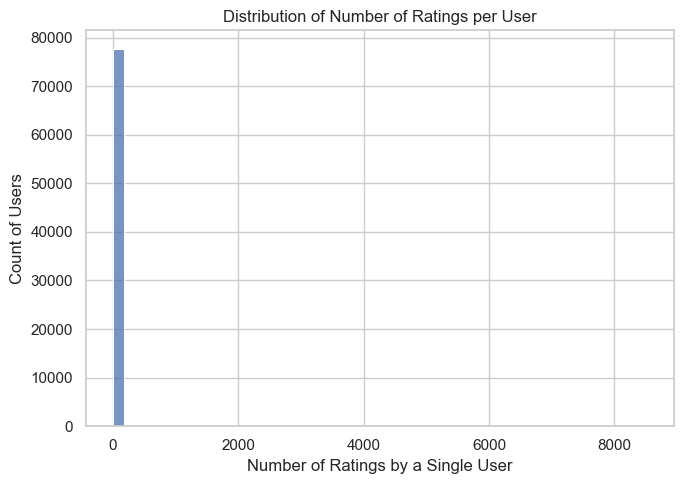

Item Popularity: Number of Users per Book
count    185973.000000
mean          2.331903
std           6.834667
min           1.000000
25%           1.000000
50%           1.000000
75%           2.000000
max         707.000000
Name: user_id, dtype: float64


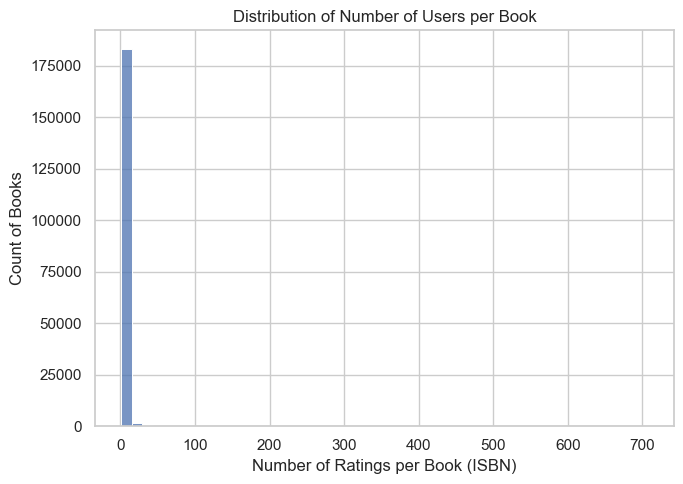

user_country
USA               139188
CANADA             21558
UNITED KINGDOM     18286
GERMANY            17022
SPAIN              13096
AUSTRALIA          11724
ITALY              11242
                    4612
FRANCE              3442
PORTUGAL            3306
Name: count, dtype: int64


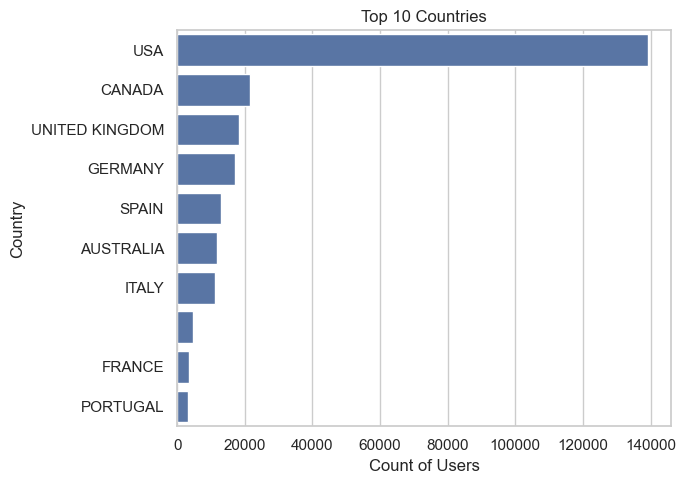

Correlation Matrix:
                          user_age  book_rating  book_year_of_publication
user_age                  1.000000     0.035668                  0.018579
book_rating               0.035668     1.000000                  0.001918
book_year_of_publication  0.018579     0.001918                  1.000000


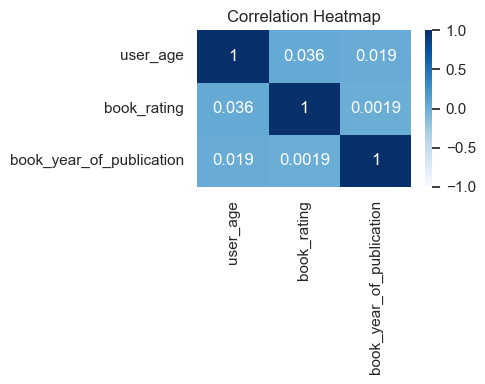

In [8]:
# Distribution of ratings per user
user_activity = ratings.groupby('user_id')['isbn'].count().sort_values(ascending=False)

print("User Activity: Number of Rated Items per User")
print(user_activity.describe())

plt.figure(figsize=(7,5))
sns.histplot(user_activity, bins=50, kde=False)
plt.title("Distribution of Number of Ratings per User")
plt.xlabel("Number of Ratings by a Single User")
plt.ylabel("Count of Users")
plt.tight_layout()

user_activity_plot_path = os.path.join("../images", "user_activity_distribution.png")
plt.savefig(user_activity_plot_path)
plt.show()

# Distribution of ratings per item (ISBN)
item_popularity = ratings.groupby('isbn')['user_id'].count().sort_values(ascending=False)

print("Item Popularity: Number of Users per Book")
print(item_popularity.describe())

plt.figure(figsize=(7,5))
sns.histplot(item_popularity, bins=50, kde=False)
plt.title("Distribution of Number of Users per Book")
plt.xlabel("Number of Ratings per Book (ISBN)")
plt.ylabel("Count of Books")
plt.tight_layout()

item_pop_plot_path = os.path.join("../images", "item_popularity_distribution.png")
plt.savefig(item_pop_plot_path)
plt.show()

# Top 10 Countries
top_countries = users['user_country'].value_counts().head(10)
print(top_countries)

plt.figure(figsize=(7,5))
sns.barplot(x=top_countries.values, y=top_countries.index)
plt.title("Top 10 Countries")
plt.xlabel("Count of Users")
plt.ylabel("Country")
plt.tight_layout()

countries_plot_path = os.path.join("../images", "top_10_countries.png")
plt.savefig(countries_plot_path)
plt.show()

# Correlation Matrix
temp_merged = pd.merge(ratings, users, on='user_id', how='inner')
temp_merged = pd.merge(temp_merged, books, on='isbn', how='inner')

numeric_cols = ['user_age', 'book_rating', 'book_year_of_publication']

numeric_df = temp_merged[numeric_cols].copy()
corr_matrix = numeric_df.corr()

print("Correlation Matrix:")
print(corr_matrix)

plt.figure(figsize=(5,4))
sns.heatmap(corr_matrix, annot=True, cmap='Blues', vmin=-1, vmax=1)
plt.title("Correlation Heatmap")
plt.tight_layout()

corr_plot_path = os.path.join("../images", "numeric_correlation_heatmap.png")
plt.savefig(corr_plot_path)
plt.show()

### Distribution of Number of Ratings per User
 
- Most users have only rated **one** book, shown by the median (`50%`) being `1.0`
- A very small group of users have rated hundreds or even thousands (up to 8524)
- This **long-tail** pattern (lots of low-activity users, very few high-activity users) is common in recommendation systems
- When a user has rated only one book, the system has limited information about their preferences. This situation is often called a **cold start**, where the model struggles to make good recommendations without enough data
- To address this, we might combine collaborative filtering with **content-based** approaches such as using book genres or authors, so we can still recommend relevant items to new or infrequent users

### Distribution of Number of Users per Book

- Most books have been rated by just **1 or 2 users**, with the median at `1.0`.  
- A tiny group of popular books has many more ratings (up to 707). 
- This **long-tail** pattern (most items have minimal ratings) is typical in large catalogs.  
- For recommendation models, this means it's hard to learn about less-rated books. A **hybrid** approach using book metadata could help newer or niche books find the right audience.

### Top 10 Countries

- The user base is **heavily dominated by the USA**, with over 139K users.  
- Canada, UK, Germany, and Spain follow, each with smaller but notable communities.  
- There's also a **blank entry** with 4612 users, indicating missing or unparsed location data.
- With such a large fraction from the USA, recommendation preferences might skew toward American tastes or availability.  
- If location-based personalization is a goal, we may need to **improve how missing locations are handled** and ensure other regions aren't overshadowed by the US majority.

### Correlation Heatmap 
- **user_age vs. book_rating**: A small positive value (~0.036) indicates **no strong relationship**. People of different ages rate books similarly on average.  
- **book_rating vs. book_year_of_publication**: ~0.002 is effectively **no correlation**—modern books don't necessarily get higher or lower ratings.  
- **user_age vs. book_year_of_publication**: Also very close to zero (0.019), suggesting older readers don't necessarily prefer older or newer books.
- None of these numeric features show a strong linear relationship with each other. If we want to use factors like a user's age or a book's publication year for recommendations, we'll likely need methods beyond a simple correlation such as feature engineering, or advanced models

In [9]:
# Step 7: Merge Datasets
ratings_with_detailed_users = pd.merge(ratings, users, on='user_id', how='inner')
ratings_with_detailed_users_and_books = pd.merge(ratings_with_detailed_users, books, on='isbn', how='inner')

print("\nFinal Merged Dataset Overview:")
print(ratings_with_detailed_users_and_books.info())

print(f"Final shape: {ratings_with_detailed_users_and_books.shape}")

# Step 8: Save Processed Data
os.makedirs("../data/processed", exist_ok=True)
processed_path = "../data/processed/ratings_with_detailed_users_and_books.csv"
ratings_with_detailed_users_and_books.to_csv(processed_path, index=False)

print(f"Processed dataset saved to {processed_path}")
print("Preprocessing completed successfully.")


Final Merged Dataset Overview:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 383842 entries, 0 to 383841
Data columns (total 14 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   user_id                   383842 non-null  int64  
 1   isbn                      383842 non-null  object 
 2   book_rating               383842 non-null  int64  
 3   user_age                  383842 non-null  int64  
 4   user_city                 383842 non-null  object 
 5   user_state                383842 non-null  object 
 6   user_country              383842 non-null  object 
 7   book_title                383842 non-null  object 
 8   book_author               383842 non-null  object 
 9   book_year_of_publication  383842 non-null  float64
 10  book_publisher            383842 non-null  object 
 11  book_image_url_s          383842 non-null  object 
 12  book_image_url_m          383842 non-null  object 
 13  book_image_u